In [45]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('/kaggle/input/heart-csv/heart.csv')
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [47]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [48]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [49]:
data = data[data.thal != 0]
data = data[data.ca != 4]

In [50]:
data.target.value_counts()

target
1    160
0    136
Name: count, dtype: int64

In [51]:
NoHeartDisease = (len(data[data.target==0]))/len(data.target)
HeartDisease = (len(data[data.target==1]))/len(data.target)
print("{:.2f}".format(NoHeartDisease))
print("{:.2f}".format(HeartDisease))



0.46
0.54


<Axes: xlabel='target', ylabel='count'>

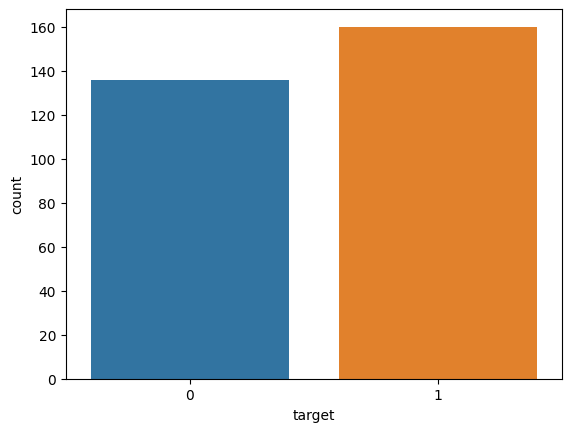

In [52]:
sns.countplot(x='target', data=data)

In [53]:
countMale = len(data[data.sex == 1])/len(data.sex)
print("Male percentage: ")
print("{:.2f}".format(countMale))

countFemale = len(data[data.sex==0])/len(data.sex)
print("Female percentage: ")
print("{:.2f}".format(countFemale))


Male percentage: 
0.68
Female percentage: 
0.32


<Axes: xlabel='sex', ylabel='count'>

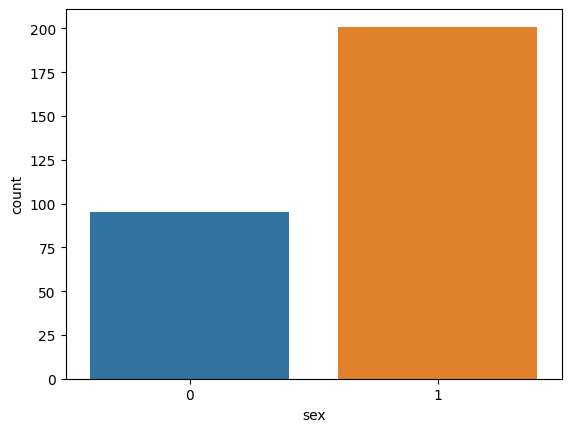

In [54]:
sns.countplot(x='sex', data=data)

In [55]:
MaleWDisease = data[data.sex == 1 & (data.target == 1)]
MaleWDisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,52.787611,0.787611,1.132743,133.044248,241.486726,0.203540,0.575221,157.663717,0.256637,0.885841,1.460177,0.469027,2.274336,0.787611
std,8.612129,0.410821,1.039440,18.653987,46.751072,0.404424,0.531260,20.564190,0.438723,1.180940,0.655136,0.897126,0.570836,0.410821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,45.000000,1.000000,0.000000,120.000000,211.000000,0.000000,0.000000,146.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,54.000000,1.000000,1.000000,130.000000,235.000000,0.000000,1.000000,160.000000,0.000000,0.400000,2.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,2.000000,140.000000,263.000000,0.000000,1.000000,173.000000,1.000000,1.400000,2.000000,1.000000,3.000000,1.000000
max,70.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [56]:
FemaleWDisease = data[data.sex == 0 & (data.target == 1)]
FemaleWDisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,95.000000,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,55.705263,0.0,1.031579,133.136842,261.778947,0.126316,0.578947,151.505263,0.231579,0.885263,1.421053,0.557895,2.147368,0.747368
std,9.455240,0.0,0.972523,19.406410,65.265445,0.333967,0.556947,19.803220,0.424079,1.122115,0.593922,0.883848,0.385051,0.436827
min,34.000000,0.0,0.000000,94.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,49.500000,0.0,0.000000,120.000000,214.500000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.500000
50%,57.000000,0.0,1.000000,132.000000,254.000000,0.000000,1.000000,157.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,63.000000,0.0,2.000000,140.000000,298.500000,0.000000,1.000000,165.000000,0.000000,1.400000,2.000000,1.000000,2.000000,1.000000
max,76.000000,0.0,3.000000,200.000000,564.000000,1.000000,2.000000,192.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [57]:
data.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.705263,1.031579,133.136842,261.778947,0.126316,0.578947,151.505263,0.231579,0.885263,1.421053,0.557895,2.147368,0.747368
1,53.965174,0.925373,130.880597,240.243781,0.154229,0.497512,148.641791,0.373134,1.141294,1.383085,0.736318,2.412935,0.442786


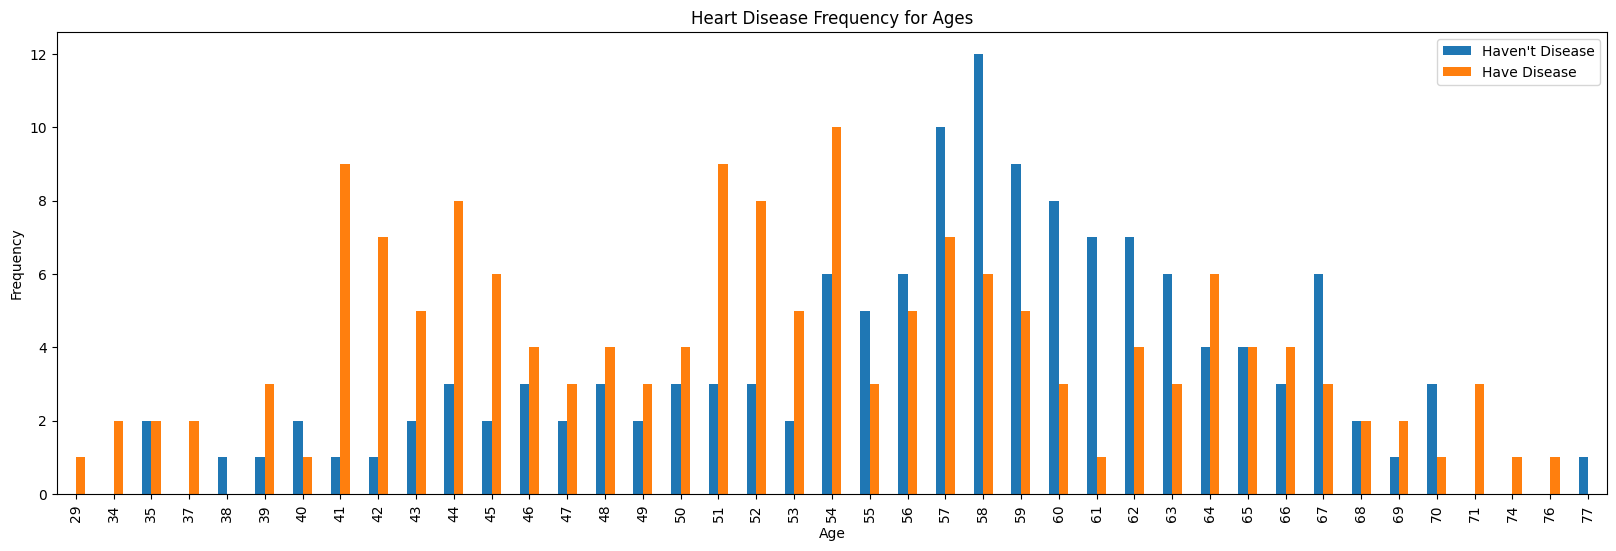

In [58]:
pd.crosstab(data.age,data.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

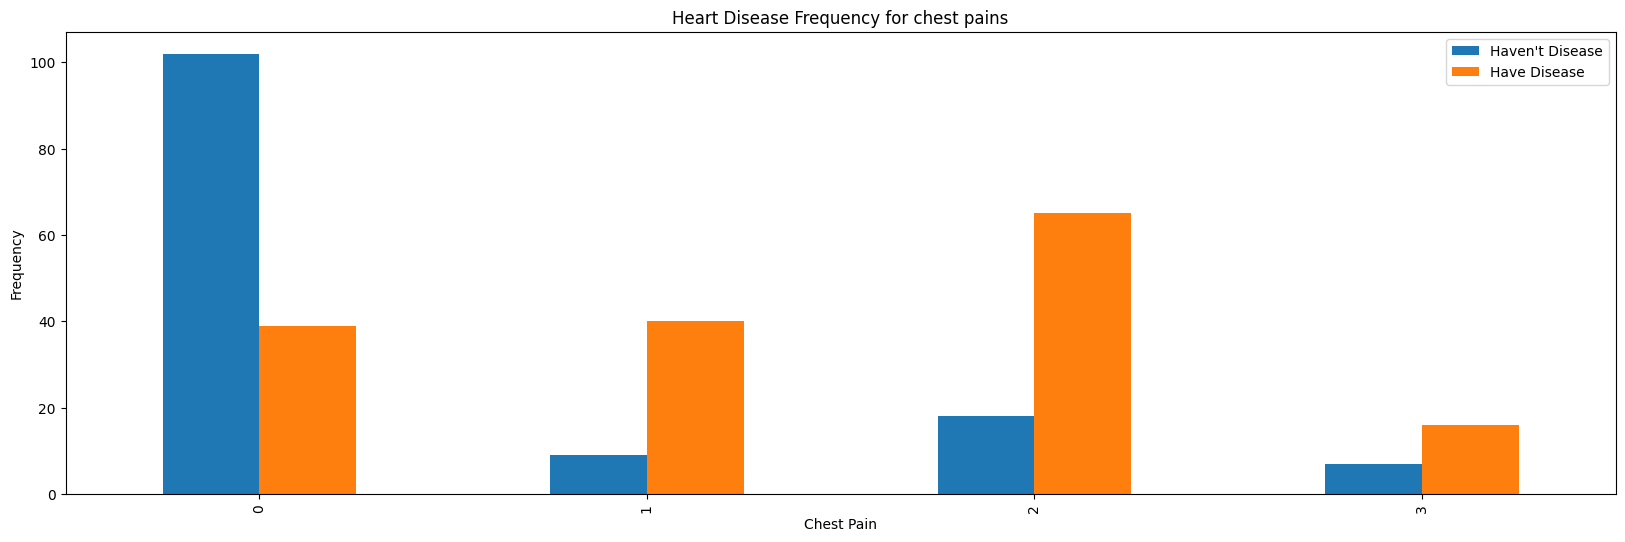

In [59]:
pd.crosstab(data.cp,data.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart Disease Frequency for chest pains')
plt.xlabel('Chest Pain')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

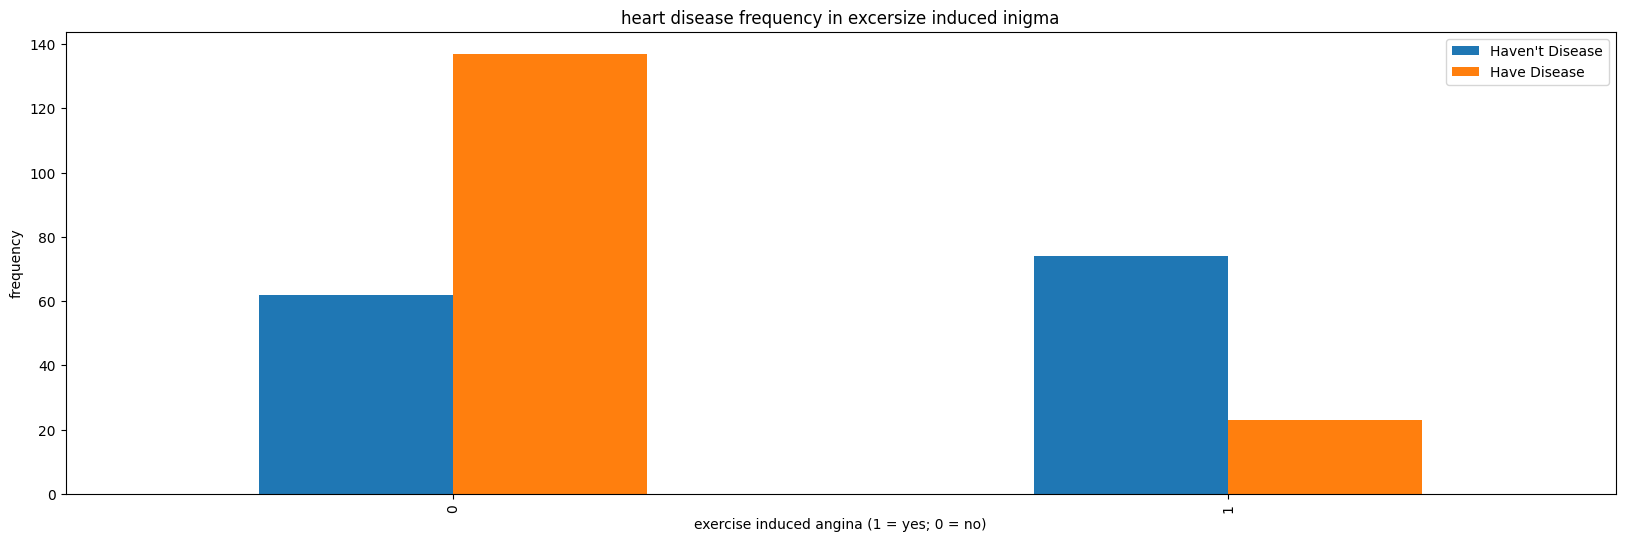

In [71]:
pd.crosstab(data.exang,data.target).plot(kind="bar", figsize=(20,6))
plt.title('heart disease frequency in excersize induced inigma')
plt.xlabel('exercise induced angina (1 = yes; 0 = no)')
plt.ylabel('frequency')
plt.legend(["Haven't Disease", "Have Disease"])

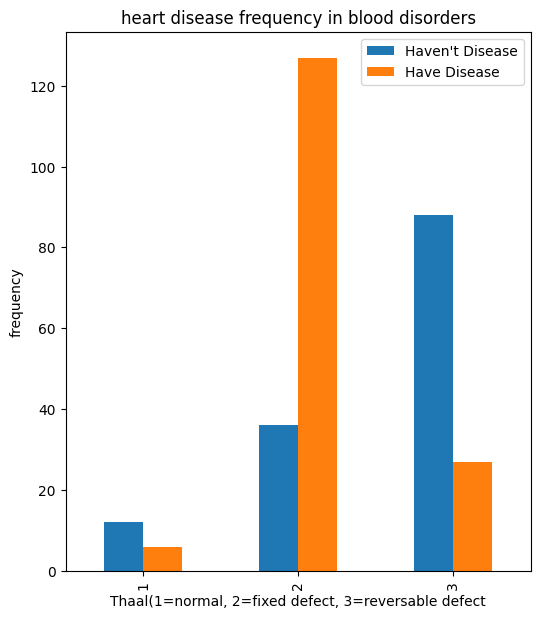

In [61]:
pd.crosstab(data.thal,data.target).plot(kind="bar", figsize=(6,7))
plt.title('heart disease frequency in blood disorders')
plt.xlabel('Thaal(1=normal, 2=fixed defect, 3=reversable defect')
plt.ylabel('frequency')
plt.legend(["Haven't Disease", "Have Disease"])


Text(0.5, 0, 'number of major vessels (0-3) colored by flourosopy')

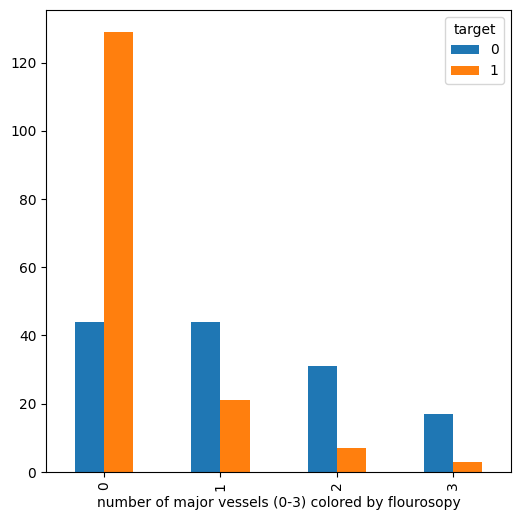

In [70]:
pd.crosstab(data.ca, data.target).plot(kind="bar", figsize=(6,6))
plt.xlabel("number of major vessels (0-3) colored by flourosopy")

Text(0.5, 0, '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')

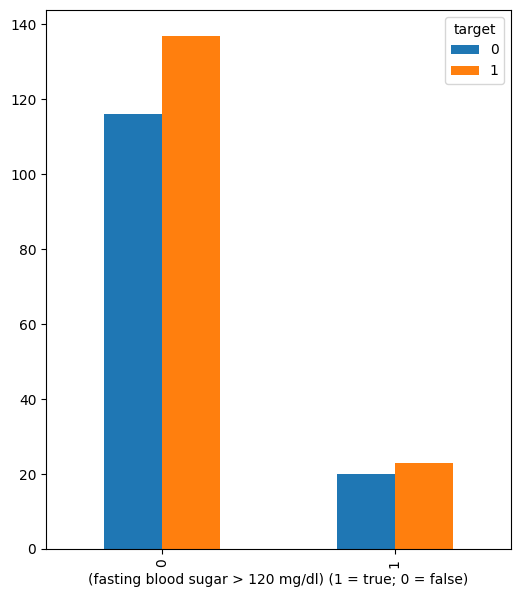

In [68]:
pd.crosstab(data.fbs, data.target).plot(kind="bar", figsize=(6,7))
plt.xlabel("(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)")

<Axes: xlabel='slope'>

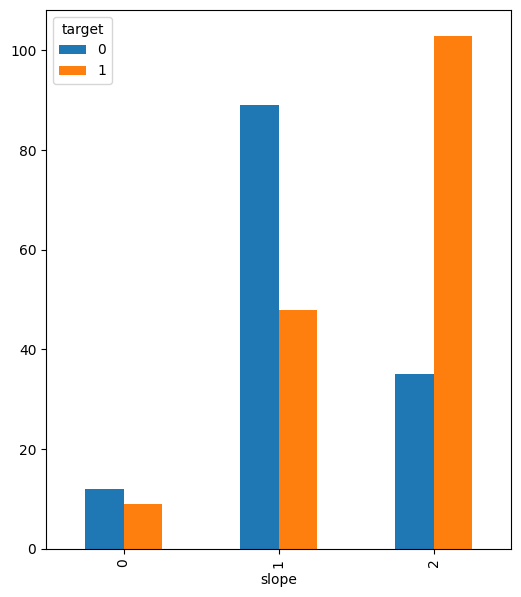

In [73]:
pd.crosstab(data.slope, data.target).plot(kind='bar', figsize=(6,7))